In [111]:
import os

In [112]:
import matplotlib.pyplot as plt
import tensorflow as tf

### Task

In [113]:
TOTAL_POINTS = 1000

In [114]:
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

In [115]:
y = x * k_true + b_true + noise

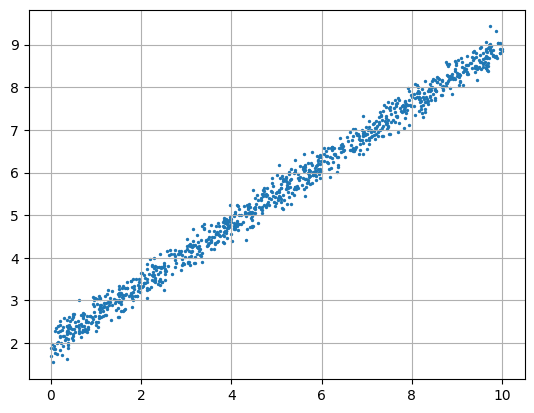

In [116]:
plt.scatter(x, y, s=2)
plt.grid()
plt.show()

### Solution

In [117]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

In [118]:
EPOCHS = 700  # Iterations number of gradient descent
learning_rate = 0.02  # Step of learning

In [119]:
# 1. Algorithm Gradient Descent
for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k * x + b
        loss = tf.reduce_mean(tf.square(y - f))
        dk, db = t.gradient(loss, [k, b])
        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)

In [120]:
print(k, b, sep='\n')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70343995>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9815757>


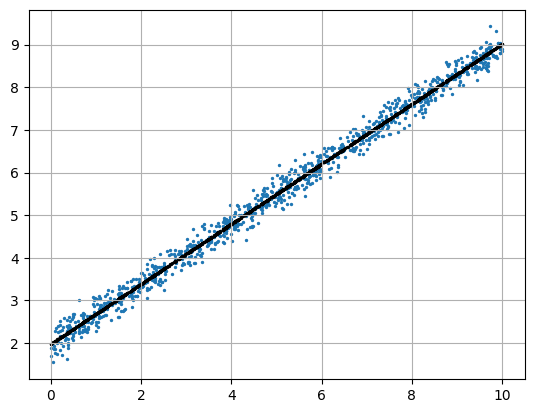

In [121]:
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [122]:
# Algorithm Stochastic Gradient Descent

In [123]:
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

EPOCHS = 50  # Iterations number of gradient descent (reduced size)
learning_rate = 0.02  # Step of learning

for n in range(EPOCHS):
    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])
        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)

In [124]:
print(k, b, sep='\n')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70070076>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9861395>


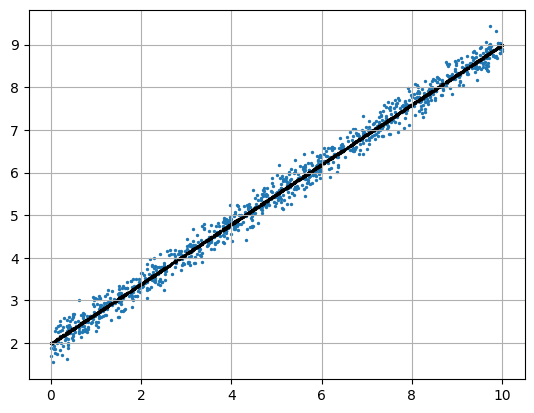

In [125]:
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [126]:
# Alternative: ready-made function

In [127]:
opt = tf.optimizers.SGD(learning_rate=learning_rate)

In [128]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE : (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE : (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7002354>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9891878>


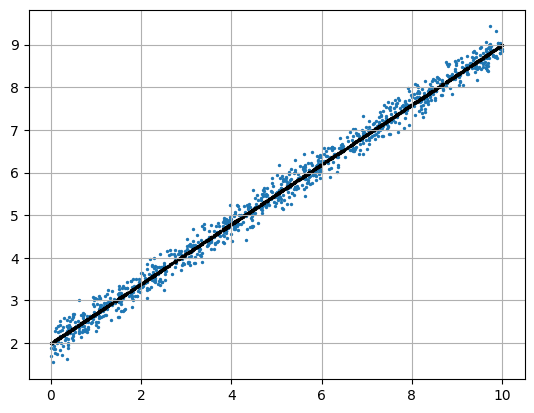

In [129]:
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [130]:
# Method of moments

In [131]:
opt = tf.optimizers.SGD(momentum=0.5, learning_rate=learning_rate)  # momentum

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.69976085>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9922969>


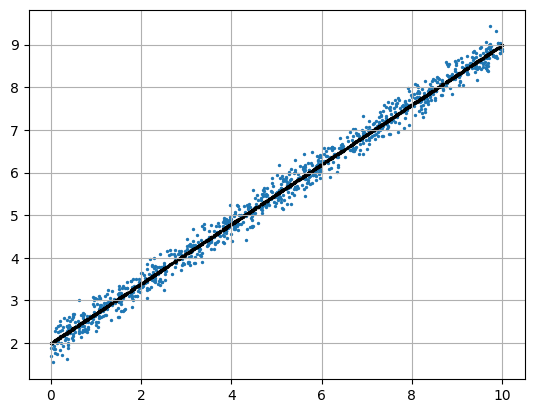

In [132]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [133]:
# Method of moments and Nesterov

In [134]:
opt = tf.optimizers.SGD(momentum=0.5, nesterov=True, learning_rate=learning_rate)  # momentum, nesterov

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6995751>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9935136>


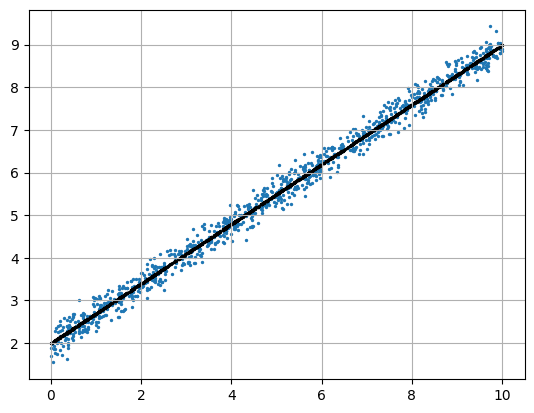

In [135]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [136]:
# Adagrad

In [137]:
opt = tf.optimizers.Adagrad(learning_rate=0.2)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70056176>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9872836>


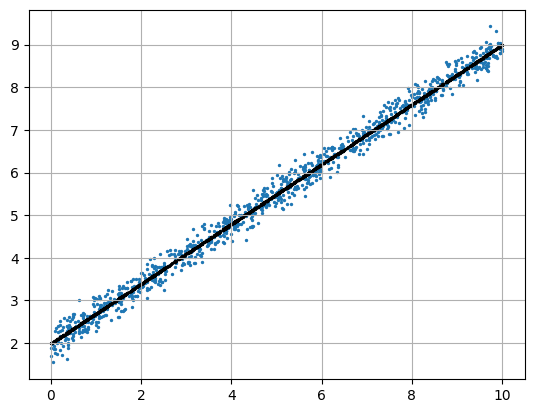

In [138]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [139]:
# Adadelta

In [140]:
opt = tf.optimizers.Adadelta(learning_rate=4.0)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7054469>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0004063>


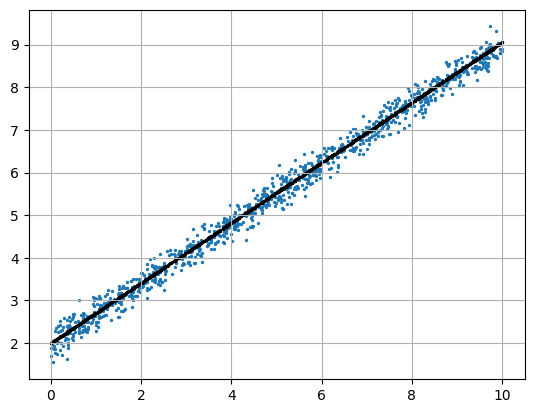

In [141]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [142]:
# RMSProb

In [143]:
opt = tf.optimizers.RMSprop(learning_rate=0.01)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7030389>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9978794>


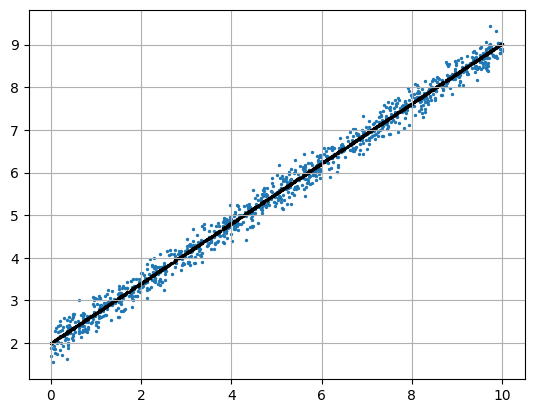

In [144]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()

In [145]:
# Adam

In [146]:
opt = tf.optimizers.Adam(learning_rate=0.1)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70173395>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9965703>


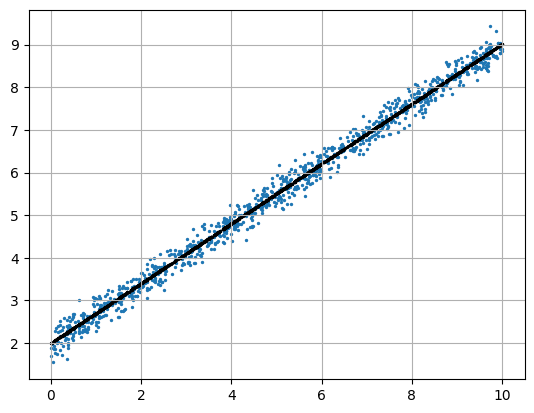

In [147]:
for n in range(EPOCHS):

    with tf.GradientTape() as t:
        for n_batch in range(num_steps):
            y_batch = y[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]
            x_batch = x[n_batch * BATCH_SIZE: (n_batch + 1) * BATCH_SIZE]

        f = k * x_batch + b
        loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
print(k, b, sep='\n')
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='black', s=2)
plt.grid()
plt.show()